Python version 3.6.6

# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

# Engenheiro de Aprendizado de Máquina Nanodegree
## Aprendizagem Supervisionada
## Project: Encontrando Doadores para * CharityML *

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.


Bem-vindo ao segundo projeto do Nanodegree Engineer Machine Learning! Neste caderno, algum código modelo já foi fornecido para você, e será seu trabalho implementar a funcionalidade adicional necessária para concluir com êxito este projeto. As seções que começam com ** 'Implementação' ** no cabeçalho indicam que o seguinte bloco de código exigirá uma funcionalidade adicional que você deve fornecer. Serão fornecidas instruções para cada seção e as especificidades da implementação serão marcadas no bloco de códigos com uma instrução `'TODO'`. Por favor, leia atentamente as instruções!

Além de implementar o código, haverá perguntas que você deve responder relacionadas ao projeto e à sua implementação. Cada seção onde você responderá uma questão é precedida por um cabeçalho ** 'Question X' **. Leia atentamente cada pergunta e forneça respostas completas nas seguintes caixas de texto que começam com ** 'Resposta:' **. A submissão do seu projeto será avaliada com base nas suas respostas para cada uma das perguntas e na implementação que você fornecer.

> ** Nota: ** Por favor, especifique QUANTA VERSÃO DE PYTHON você está usando ao enviar este caderno. As células Code e Markdown podem ser executadas usando o atalho de teclado ** Shift + Enter **. Além disso, as células Markdown podem ser editadas clicando duas vezes na célula para entrar no modo de edição

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

## Começando

Neste projeto, você empregará vários algoritmos supervisionados de sua escolha para modelar com precisão a renda dos indivíduos usando dados coletados do Censo de 1994 nos EUA. Você então escolherá o melhor algoritmo candidato a partir de resultados preliminares e otimizará ainda mais esse algoritmo para melhor modelar os dados. Seu objetivo com essa implementação é construir um modelo que prevê com precisão se um indivíduo ganha mais de US $ 50.000. Esse tipo de tarefa pode surgir em um ambiente sem fins lucrativos, onde as organizações sobrevivem com doações. Compreender a renda de um indivíduo pode ajudar uma organização sem fins lucrativos a entender melhor o tamanho de uma doação a ser solicitada ou se deve ou não entrar em contato. Embora possa ser difícil determinar a faixa de renda geral de um indivíduo diretamente de fontes públicas, podemos (como veremos) deduzir esse valor de outros recursos disponíveis publicamente.

O conjunto de dados para este projeto é originário do [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/datasets/Census+Income). O datset foi doado por Ron Kohavi e Barry Becker, após ser publicado no artigo _ "Aumento da precisão dos classificadores Naive-Bayes: um híbrido de árvore de decisão" _. Você pode encontrar o artigo de Ron Kohavi [online] (https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). Os dados que investigamos aqui consistem em pequenas alterações no conjunto de dados original, como a remoção do recurso '' fnlwgt'` e registros com entradas ausentes ou mal formatadas.


----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

## Explorando os dados
Execute a célula de código abaixo para carregar as bibliotecas necessárias do Python e carregar os dados do censo. Observe que a última coluna deste conjunto de dados, '' income'`, será nosso rótulo de destino (se um indivíduo fizer mais do que, ou no máximo $ 50.000 por ano). Todas as outras colunas são características sobre cada indivíduo no banco de dados do censo.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

### Implementação: Exploração de Dados
Uma investigação superficial do conjunto de dados determinará quantas pessoas se encaixam em qualquer um dos grupos e nos informará sobre a porcentagem dessas pessoas que ganham mais que \$50.000. Na célula de código abaixo, você precisará calcular o seguinte:
- O número total de registros, `'n_records'`
- O número de indivíduos que ganham mais que \$50.000 por ano, `'n_greater_50k'`.
- O número de indivíduos que ganham no máximo \$50.000 por ano, `'n_at_most_50k'`.
- A porcentagem de indivíduos ganhando mais que \$50.000 por ano, `'greater_percent'`.

** DICA: ** Pode ser necessário consultar a tabela acima para entender como as entradas '' income'` são formatadas.

In [2]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income']=='>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income']=='<=50K'])


# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(100*greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

** Exploração de conjunto de recursos **

* ** idade **: contínua.
* ** classe de trabalho **: Privado, Auto-emp-não-inc, Auto-emp-inc, Governo federal, Local-governador, Estado-governador, Sem pagamento, Nunca trabalhado.
* ** educação **: Bacharelado, Alguma-faculdade, 11º, HS-grad, Prof.-escola, Assoc-acdm, Assoc-voc, 9º, 7º-8º, 12º, Mestrado, 1º-4º, 10º, Doutorado, 5º 6ª pré-escola.
* ** education-num **: contínuo.
* ** estado civil **: Casado-cônjuge, divorciado, nunca casado, separado, viúvo, casado-cônjuge-ausente, casado-AF-cônjuge.
* ** ocupação **: Suporte técnico, Conserto de Artesanato, Outros serviços, Vendas, Exec-gerencial, Prof-speciality, Manipuladores-limpadores, Máquina-op-inspct, Adm-clerical, Pesca agropecuária, Transporte em movimento , Priv-house-serv, Protetora-serv, Forças Armadas.
* ** Relacionamento **: Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteiro.
* ** Corrida **: Preto, Branco, Asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.
* ** sexo **: Feminino, Masculino.
* ** ganho de capital **: contínuo.
* ** perda de capital **: contínua.
* ** horas por semana **: contínuo.
* ** país nativo **: Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, Japão, Grécia, Sul, China, Cuba, Irã, Honduras, Filipinas, Itália, Polônia, Jamaica, Vietnã, México, Portugal, Irlanda, França, República Dominicana, Laos, Equador, Taiwan, Haiti, Colômbia, Hungria, Guatemala, Nicarágua, Escócia, Tailândia, Iugoslávia, El-Salvador, Trinadad e Tobago, Peru, Hong, Holanda-Holanda.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

## Preparando os dados
Antes que os dados possam ser usados como entrada para algoritmos de aprendizado de máquina, eles geralmente precisam ser limpos, formatados e reestruturados - isso é normalmente conhecido como ** pré-processamento **. Felizmente, para este conjunto de dados, não há entradas inválidas ou ausentes com as quais precisamos lidar, no entanto, há algumas qualidades sobre determinados recursos que devem ser ajustados. Esse pré-processamento pode ajudar tremendamente com o resultado e o poder preditivo de quase todos os algoritmos de aprendizado.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

### Transformação de recursos contínuos enviesados
Às vezes, um conjunto de dados pode conter pelo menos um recurso cujos valores tendem a ficar próximos a um único número, mas também terá um número não trivial de valores muito maiores ou menores do que esse número único. Algoritmos podem ser sensíveis a tais distribuições de valores e podem ter um desempenho inferior se o intervalo não for devidamente normalizado. Com o conjunto de dados do censo, duas características se encaixam nessa descrição: '`capital-ganho'` e`' capital-loss'`.

Execute a célula de código abaixo para plotar um histograma desses dois recursos. Observe o intervalo dos valores presentes e como eles são distribuídos.


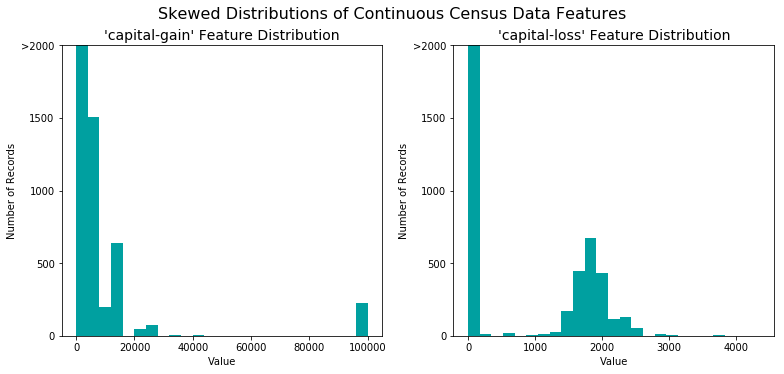

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
# Visualize recursos contínuos distorcidos dos dados originais
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

Para distribuições de características altamente distorcidas, como `'capital-ganho'` e `'capital-loss'`, é uma prática comum aplicar uma <a href =" https://en.wikipedia.org/wiki/Data_transformation_ ( estatísticas) "> transformação logarítmica </a> nos dados para que os valores muito grandes e muito pequenos não afetem negativamente o desempenho de um algoritmo de aprendizado. Usando uma transformação logarítmica reduz significativamente o intervalo de valores causados por outliers. Deve-se tomar cuidado ao aplicar esta transformação, no entanto: O logaritmo de `0` é indefinido, portanto devemos traduzir os valores por uma pequena quantidade acima de` 0` para aplicar o logaritmo com sucesso.

Execute a célula de código abaixo para realizar uma transformação nos dados e visualizar os resultados. Novamente, observe o intervalo de valores e como eles são distribuídos.

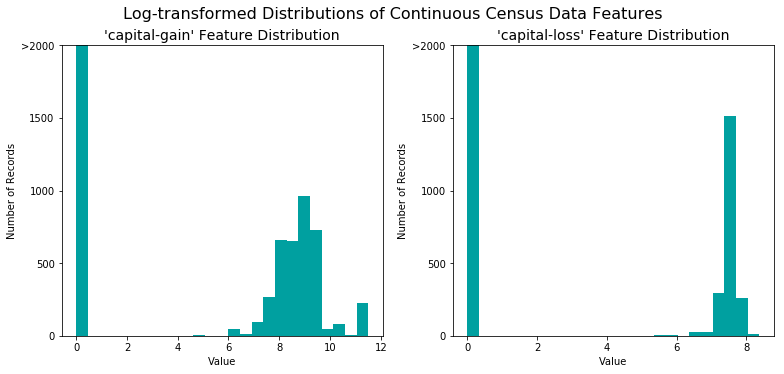

In [4]:
# Log-transform the skewed features
# Log-transformar os recursos distorcidos
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize as novas distribuições de log
# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)



### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.


### Normalizando recursos numéricos
Além de realizar transformações em recursos altamente distorcidos, geralmente é recomendável realizar algum tipo de dimensionamento em recursos numéricos. A aplicação de um escalonamento aos dados não altera a forma da distribuição de cada característica (como '' capital-gain'` ou `'capital-loss'` acima); no entanto, a normalização garante que cada recurso seja tratado igualmente ao aplicar alunos supervisionados. Observe que, uma vez aplicado o dimensionamento, a observação dos dados em sua forma bruta não terá mais o mesmo significado original, conforme demonstrado abaixo.

Execute a célula de código abaixo para normalizar cada recurso numérico. Usaremos [`sklearn.preprocessing.MinMaxScaler`] (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) para isso.


In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

"""
# Import sklearn.preprocessing.StandardScaler
de sklearn.preprocessing import MinMaxScaler

# Inicialize um scaler e aplique-o aos recursos
scaler = MinMaxScaler () # default = (0, 1)
numerical = ['age', 'education-num', 'ganho de capital', 'perda de capital', 'horas por semana']

features_log_minmax_transform = pd.DataFrame (data = features_log_transformed)
features_log_minmax_transform [numérico] = scaler.fit_transform (features_log_transformed [numerical])

# Mostrar um exemplo de um registro com dimensionamento aplicado
display (features_log_minmax_transform.head (n = 5))
"""

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


"\n# Import sklearn.preprocessing.StandardScaler\nde sklearn.preprocessing import MinMaxScaler\n\n# Inicialize um scaler e aplique-o aos recursos\nscaler = MinMaxScaler () # default = (0, 1)\nnumerical = ['age', 'education-num', 'ganho de capital', 'perda de capital', 'horas por semana']\n\nfeatures_log_minmax_transform = pd.DataFrame (data = features_log_transformed)\nfeatures_log_minmax_transform [numérico] = scaler.fit_transform (features_log_transformed [numerical])\n\n# Mostrar um exemplo de um registro com dimensionamento aplicado\ndisplay (features_log_minmax_transform.head (n = 5))\n"

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.
   
### Implementação: pré-processamento de dados

Na tabela em ** Explorando os dados ** acima, podemos ver que há vários recursos para cada registro que não são numéricos. Geralmente, os algoritmos de aprendizado esperam que a entrada seja numérica, o que requer que recursos não numéricos (chamados * variáveis ​​categóricas *) sejam convertidos. Uma maneira popular de converter variáveis ​​categóricas é usando o esquema ** codificação de uma só vez **. Uma codificação quente cria uma variável _ "fictícia" para cada categoria possível de cada recurso não numérico. Por exemplo, suponha que `someFeature` possua três entradas possíveis:` A`, `B` ou` C`. Em seguida, codificamos esse recurso em `someFeature_A`,` someFeature_B` e `someFeature_C`.

| | someFeature | | someFeature_A | someFeature_B | someFeature_C |
| : -: | : -: | | : -: | : -: | : -: |
| 0 | B | | 0 | 1 | 0 |
| 1 | C | ----> codificação one-hot ----> | 0 | 0 | 1 |
| 2 | A | | 1 | 0 | 0 |

Além disso, como acontece com os recursos não numéricos, precisamos converter o rótulo de destino não numérico, '' income'`, em valores numéricos para que o algoritmo de aprendizado funcione. Como existem apenas duas categorias possíveis para este rótulo ("<= 50K" e "> 50K"), podemos evitar o uso de uma codificação hot e simplesmente codificar essas duas categorias como `0` e` 1`, respectivamente. Na célula de código abaixo, você precisará implementar o seguinte:
 - Use [`pandas.get_dummies ()`] (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para executar uma codificação a quente nos dados `'features_log_minmax_transform'`.
 - Converte o rótulo de destino `'income_raw'` para entradas numéricas.
   - Defina registros com "<= 50K" para "0" e grave com "> 50K" para "1".

In [6]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw
income[income=='<=50K']=0
income[income=='>50K']=1
#income = pd.get_dummies(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)
"""
# TODO: Um-quente codifica os dados 'features_log_minmax_transform' usando pandas.get_dummies ()
features_final = nenhum

# TODO: Codifique os dados 'income_raw' para valores numéricos
renda = nenhuma

# Imprima o número de recursos após uma codificação a quente
codificado = list (features_final.columns)
print ("{} total de recursos após uma codificação quente." format (len (codificado)))

# Descomente a seguinte linha para ver os nomes dos recursos codificados
# print codificado
"""

103 total features after one-hot encoding.


C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


'\n# TODO: Um-quente codifica os dados \'features_log_minmax_transform\' usando pandas.get_dummies ()\nfeatures_final = nenhum\n\n# TODO: Codifique os dados \'income_raw\' para valores numéricos\nrenda = nenhuma\n\n# Imprima o número de recursos após uma codificação a quente\ncodificado = list (features_final.columns)\nprint ("{} total de recursos após uma codificação quente." format (len (codificado)))\n\n# Descomente a seguinte linha para ver os nomes dos recursos codificados\n# print codificado\n'

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

### Shuffle and Split Data
Agora, todas as variáveis _categoricas_ foram convertidas em recursos numéricos e todos os recursos numéricos foram normalizados. Como sempre, agora dividiremos os dados (recursos e rótulos) em conjuntos de treinamento e teste. 80% dos dados serão usados para treinamento e 20% para testes.

Execute a célula de código abaixo para realizar esta divisão.


In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

X_train=X_train.astype('int') 
y_train=y_train.astype('int') 
X_test=X_test.astype('int') 
y_test=y_test.astype('int') 
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

----
## Avaliando o Desempenho do Modelo
Nesta seção, investigaremos quatro algoritmos diferentes e determinaremos qual é a melhor modelagem dos dados. Três desses algoritmos serão aprendizes supervisionados de sua escolha, e o quarto algoritmo é conhecido como * preditor * ingênuo.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Métricas e o Predictor Naive
*A CharityML*, equipada com suas pesquisas, sabe que indivíduos que ganham mais de \$ 50.000 são mais propensos a doar para sua instituição de caridade. Por causa disso, *CharityML* está particularmente interessado em prever quem faz mais de \$50.000 com precisão. Parece que usar a **precisão** como uma métrica para avaliar a performance de um modelo em particular seria apropriado. Além disso, identificar alguém que *não* ganha mais do que \$50.000 como alguém que o faria seria prejudicial para *CharityML*, já que eles estão procurando pessoas dispostas a doar. Portanto, a capacidade de um modelo prever com precisão aqueles que ganham mais de $ 50.000 é *mais importante* do que a capacidade do modelo de **lembrar** esses indivíduos. Podemos usar o **F-beta score** como uma métrica que considera a precisão e a recordação:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Em particular, quando $\beta = 0.5$, mais ênfase é dada à precisão. Isso é chamado de **F$_{0,5}$score**(ou F-score para simplificar).

Olhando para a distribuição de classes (aqueles que ganham no máximo \$50.000 e aqueles que ganham mais), fica claro que a maioria das pessoas não ganha mais do que \$50.000. Isso pode afetar muito a **precisão**, já que poderíamos simplesmente dizer *"essa pessoa não ganha mais que \$50.000"* e, em geral, estar certa, sem nunca olhar para os dados! Fazer tal declaração seria chamado de **ingênuo**, uma vez que não consideramos nenhuma informação para fundamentar a reivindicação. É sempre importante considerar a *previsão ingênua* para seus dados, para ajudar a estabelecer uma referência para o desempenho adequado de um modelo. Isso foi dito, usar essa previsão seria inútil: se prevíssemos que todas as pessoas ganhassem menos que \$50.000, *a CharityML* não identificaria ninguém como doadores.


#### Nota: Recapitulação de exatidão, precisão, recordação

**Precisão** mede com que frequência o classificador faz a previsão correta. É a proporção entre o número de previsões corretas e o número total de previsões (o número de pontos de dados de teste).

**Precisão** nos diz qual a proporção de mensagens que classificamos como spam, na verdade, eram spam.
É uma proporção de verdadeiros positivos (palavras classificadas como spam, e que são, na verdade, spam) para todos os positivos (todas as palavras classificadas como spam, independentemente de essa ser a classificação correta), em outras palavras, é a razão entre

`[Verdadeiro Positivo / (Verdadeiro Positivo + Falso Positivo)]`

**Lembre-se (sensibilidade)** nos diz qual a proporção de mensagens que realmente eram spam foram classificados por nós como spam.
É uma proporção de verdadeiros positivos (palavras classificadas como spam e que são, na verdade, spam) para todas as palavras que eram realmente spam, em outras palavras, é a razão entre

`[Verdadeiro Positivo / (Verdadeiro Positivo + Falso Negativo)]`

Para problemas de classificação que são distorcidos em suas distribuições de classificação, como em nosso caso, por exemplo, se tivéssemos 100 mensagens de texto e apenas 2 fossem spam e o restante 98 não, a precisão por si só não é uma métrica muito boa. Poderíamos classificar 90 mensagens como não spam (incluindo as 2 que eram spam, mas classificá-las como não spam, portanto, seriam falsos negativos) e 10 como spam (todos os 10 falsos positivos) e ainda obter uma pontuação de precisão razoavelmente boa. Para tais casos, a precisão e o recall são muito úteis. Essas duas métricas podem ser combinadas para obter a pontuação F1, que é a média ponderada (média harmônica) dos escores de precisão e recordação. Esta pontuação pode variar de 0 a 1, sendo 1 a melhor pontuação possível na F1 (tomamos a média harmônica, pois estamos lidando com proporções).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

### Question 1 - Naive Predictor Performace
* Se escolhermos um modelo que sempre previu que um indivíduo fez mais de US $ 50.000, qual seria a precisão e o F-score desse modelo neste conjunto de dados? Você deve usar a célula de código abaixo e atribuir seus resultados a `'accuracy'` e`' fscore'` para serem usados ​​mais tarde.

** Por favor, note ** que o propósito de gerar um preditor ingênuo é simplesmente mostrar como seria um modelo básico sem qualquer inteligência. No mundo real, idealmente, seu modelo básico seria o resultado de um modelo anterior ou poderia ser baseado em um trabalho de pesquisa sobre o qual você deseja melhorar. Quando não há um conjunto de modelos de referência, obter um resultado melhor do que a escolha aleatória é um lugar de onde você pode começar.

** DICA: **

* Quando temos um modelo que sempre prevê '1' (ou seja, o indivíduo ganha mais de 50k), então nosso modelo não terá True Negatives (TN) ou False Negatives (FN), pois não estamos fazendo nenhum valor negativo ('0' ) previsões. Portanto, a nossa Acurácia neste caso se torna a mesma que a nossa Precisão (Positivos Verdadeiros / (Positivos Verdadeiros + Positivos Falsos)) como toda predição que fizemos com o valor '1' que deveria ter '0' se torna um Falso Positivo; portanto, nosso denominador, neste caso, é o número total de registros que temos no total.
* Nossa pontuação Recall (True Positives / (True Positives + False Negatives)) neste cenário se torna 1, pois não temos False Negatives.

In [8]:
TP = np.sum(income) # Contando os como este é o caso ingênuo. Note que 'renda' é o dado 'income_raw'
#codificado para valores numéricos feitos na etapa de pré-processamento de dados.
FP = income.count()-TP # Específico para o caso ingênuo

TN = 0 # Nenhum negativo previsto no caso ingênuo
FN = 0 # Nenhum negativo previsto no caso ingênuo

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)           #Accuracy = (TP +TN ) / (TP + FP +TN +FN). 
recall = TP/(TP+FN)                        #recall = True Positives/(True Positives + False Negatives)
precision = TP/(TP+FP)                     #precision = True Positives/(True Positives + False Positives)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*precision*recall/(beta**2*precision+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Modelos de aprendizagem supervisionados
** A seguir estão alguns dos modelos de aprendizado supervisionado que estão atualmente disponíveis no ** [`scikit-learn`] (http://scikit-learn.org/stable/supervised_learning.html) ** que você pode escolher: **
- Gaussian Naive Bayes (GaussianNB)
- Árvores de decisão
- Métodos Ensemble (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-vizinhos mais próximos (KNeighbors)
- Classificador Estocástico de Descida de Gradiente (SGDC)
- Support Vector Machines (SVM)
- Regressão Logística

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

### Questão 2 - Aplicação do Modelo
Liste três dos modelos de aprendizado supervisionado acima que são apropriados para esse problema que você testará nos dados do censo. Para cada modelo escolhido

- Descreva uma aplicação do mundo real na indústria onde o modelo pode ser aplicado.
- Quais são os pontos fortes do modelo? quando funciona bem?
- Quais são as fraquezas do modelo; quando funciona mal?
O que faz deste modelo um bom candidato para o problema, dado o que você sabe sobre os dados?

** DICA: **

Estruture sua resposta no mesmo formato acima ^, com 4 partes para cada um dos três modelos que você escolher. Por favor, inclua referências com sua resposta.

**Answer:** 
Os modelos escolhidos são: 

**1-Gaussian Naive Bayes(GaussianNB)**

Pode ser usado para fornecer a probabilidade de uma pessoa fazer uma doação, poderia ser considerado um threshold, um valor limite, por exemplo threshold=0.9, se o valor previsto pelo modelo exceder esse threshold, podemos considerar que a pessoa irá fazer a doação.

1.1-As principais aplicações do algoritmo são:

Categorização de notícias, detecção de spam por e-mail, reconhecimento facial, análise de sentimentos, diagnóstico médico, reconhecimento de dígitos e previsão do tempo.

1.2- Os pontos positivos do modelo:

Possui um desempenho relativamente superior a outros classificadores, por ser simples e rápido. Além disso, o algorítimo Naive Bayes precisa de um conjunto de dados de teste relativamente pequeno, para concluir classificações com uma boa precisão.
funciona bem quando as características(features) que o algorítimo usa para fazer previsões são independentes entre si.

1.3- Os pontos negativos do modelo:
A principal fraquesa do modelo é que ele desconsidera completamente a correlação entre as variáveis(features). ou seja ele considera que os recursos (variáveis) que o algorítimo usa para fazer previsões são independentes entre si, isso é uma simplificação da realidade, considero esse classificador adequado, pois suponho que a relação entre as características do modelo, não é significativa.

referências: 

https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used

https://www.organicadigital.com/seeds/algoritmo-de-classificacao-naive-bayes/

**2-Árvores de decisão**
Árvores de decisão são usadas em problemas de classificação de modo geral, podem ser usadas para prever se uma pessoa irá fazer uma doação com base em cada característica encontrada nos dados

1.1-As principais aplicações do algoritmo são:

gestão logística empresarial,  pontuação de crédito, risco de crime, diagnóstico médico, previsão de falhas, bagging ou boosting.

1.2- Os pontos positivos do modelo:

É um algorítimo bastante simples, rápido, fácil de implementar, funciona muito bem quando os dados são esparsos, ou seja no caso de disgnósticos de doenças, quando uma porcentagem muito pequena dos dados corresponde a um verdadeiro positivo.

1.3- Os pontos negativos do modelo:

Quando os dados não são esparsos, ou seja, quando os dados estão aproximadamente distribuídos igualmente entre as classes, o modelo tem um desempenho ruim. esse modelo parece ser um bom candidato para o problema porque os dados são esparsos, ou seja a grande maioria das pessoas ganha menos que $ 50,000 por ano, aproximadamente 24%. 

referências: 

https://periodicos.ufsm.br/coming/article/view/21132

https://acervodigital.ufpr.br/handle/1884/46683

https://www.quora.com/In-what-real-world-applications-is-the-decision-tree-classifier-used

http://www.lbd.dcc.ufmg.br/colecoes/sbsi/2013/009.pdf


**3-Support Vector Machines(SVM)**

SVM é um algorítimo de classificação muito usado, pois possuei um ótimo desempenho, usa o kernel trick para encontrar a melhor linha que separa os dados, o objetivo é encontrar a linha que maximiza a distância entre os pontos mais próximos em relação a cada uma das classes, esse modelo é uma ótima escolha para o problema em questão.

1.1-As principais aplicações do algoritmo são:

em aplicações geográficas, como na análise espaço-temporal do uso e ocupação do solo, na area médica, para predição do risco de morte de pacientes internados com alguma doença, reconhecimento facial, categorização de Texto e hypertexto, classificação de imagens, bioinformática, Detecção de proteínas e homologia remota, reconhecimento de manuscrito, controle preditivo generalizado(GPC).

1.2- Os pontos positivos do modelo:

Esse algorítimo possui diferentes funções de kernel, as principais são linear, polinomial, rbf etc.. essas funções possuem um ótimo desempenho na maioria das tarefas de classificação, mas em alguns conjuntos de dados elas podem não ser muito adequadas.

1.3- Os pontos negativos do modelo:

Em alguns casos as funções de kernel citadas acima, não são adequadas para classificar os dados, desse modo o algorítimo não possuirá uma boa performance, o algorítimo SVM é muito adequado para essa tarefa pois o data-set não é muito complexo, e as funções do kernel disponíveis são mais que suficientes para classificar bem os dados. 

referências: 

http://www.seer.ufu.br/index.php/caminhosdegeografia/article/view/24446

http://www.din.uem.br/sbpo/sbpo2010/pdf/72295.pdf

https://pt.wikipedia.org/wiki/Máquina_de_vetores_de_suporte

https://data-flair.training/blogs/applications-of-svm/

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!
   
### Implementação - Criando um pipeline de treinamento e previsão
Para avaliar adequadamente o desempenho de cada modelo escolhido, é importante criar um pipeline de treinamento e previsão que permita treinar modelos de maneira rápida e eficiente usando vários tamanhos de dados de treinamento e realizar previsões nos dados de teste. Sua implementação aqui será usada na seção a seguir.
No bloco de código abaixo, você precisará implementar o seguinte:
 - Importe `fbeta_score` e` accuracy_score` de [`sklearn.metrics`] (http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Coloque o aluno nos dados de treinamento da amostra e registre o tempo de treinamento.
 - Execute previsões nos dados de teste `X_test`, e também nos primeiros 300 pontos de treinamento` X_train [: 300] `.
   - Registre o tempo total de previsão.
 - Calcule a pontuação de precisão para o subconjunto de treinamento e o conjunto de testes.
 - Calcular o F-score para o subconjunto de treinamento e o conjunto de testes.
   - Certifique-se de definir o parâmetro `beta`!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set-
       o tamanho das amostras (número) a serem retiradas do conjunto de treinamento
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    # TODO: Adapte o aluno aos dados de treinamento usando o 
    #fatiamento com 'sample_size' usando .fit (training_features [:], training_labels [:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    
    # TODO: Obtenha as previsões no conjunto de testes (X_test),
    # então obtenha previsões nas primeiras 300 amostras de treinamento (X_train) usando .predict ()
    
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    beta=0.01  
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

### Implementação: Avaliação Inicial do Modelo
Na célula de código, você precisará implementar o seguinte:
- Importe os três modelos de aprendizado supervisionados que você discutiu na seção anterior.
- Inicialize os três modelos e armazene-os em `'clf_A', clf_B e clf_.
   - Use um `'random_state'` para cada modelo que você usar, se fornecido.
   - ** Nota: ** Use as configurações padrão para cada modelo - você irá ajustar um modelo específico em uma seção posterior.
- Calcule o número de registros igual a 1%, 10% e 100% dos dados de treinamento.
   - Armazene esses valores em `'samples_1'`,`' samples_10'` e `'samples_100'` respectivamente.

** Nota: ** Dependendo de quais algoritmos você escolheu, a implementação a seguir pode levar algum tempo para ser executada!


MultinomialNB trained on 361 samples.
MultinomialNB trained on 3617 samples.
MultinomialNB trained on 36177 samples.


C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


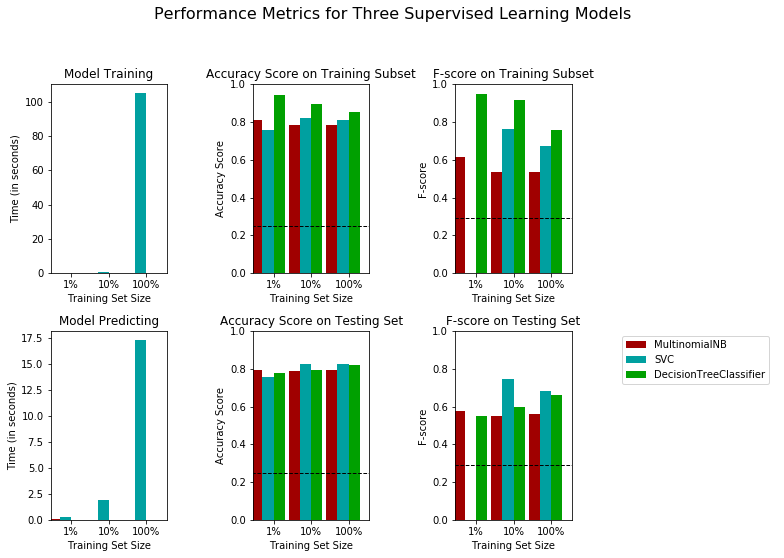

In [10]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = MultinomialNB() #naive_bayes
clf_B = SVC(random_state=33)
#clf_B = SVC(kernel='rbf',gamma=30, C=1, random_state=33)
clf_C = DecisionTreeClassifier(random_state=44)
#clf_C = DecisionTreeClassifier(max_depth=6,min_samples_leaf=6,min_samples_split=10, random_state=44)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)

# TODO: calcular o número de amostras para 1%, 10% e 100% dos dados de treinamento
# DICA: samples_100 é o conjunto de treinamento inteiro, ou seja, len (y_train)
# HINT: samples_10 é 10% de samples_100 (certifique-se de definir a contagem dos valores como int e não como float)
# HINT: samples_1 é 1% de samples_100 (certifique-se de definir a contagem dos valores como int e não como float)
samples_100 = int(len(y_train))
samples_10 = int(0.1*samples_100)
samples_1 =  int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

----
## Melhorando Resultados
Nesta seção final, você escolherá entre os três modelos de aprendizado supervisionado o modelo * melhor * para usar nos dados do aluno. Você então realizará uma otimização de busca de grade para o modelo sobre todo o conjunto de treinamento (`X_train` e` y_train`) ajustando pelo menos um parâmetro para melhorar o F-score do modelo desafinado.


### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

### Pergunta 3 - Escolhendo o Melhor Modelo

* Com base na avaliação que você realizou anteriormente, em um a dois parágrafos, explique para * CharityML * qual dos três modelos você acredita ser o mais apropriado para a tarefa de identificar indivíduos que ganham mais que \ $ 50.000.

** DICA: **
Observe o gráfico no canto inferior esquerdo da célula acima (a visualização criada por `vsevaluate (resultados, precisão, fscore)`) e verifique a pontuação F do conjunto de testes quando 100% do conjunto de treinamento é usado. Qual modelo tem a maior pontuação? Sua resposta deve incluir a discussão do:
* métricas - pontuação F no teste quando 100% dos dados de treinamento são usados,
* previsão / tempo de treinamento
* adequação do algoritmo para os dados.

**Answer: ** O algorítimo escolhido foi o SVC pois entre todos os modelos, foi o que apresentou o melhor desempenho nas métricas F-score e acurácia no conjunto de testes quando 100% dos dados foram usados, também levando em consideração o tempo de previsão /treinamento e a adequação do algoritmo ao conjunto de dados em questão.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

### Pergunta 4 - Descrevendo o modelo em termos de leigo

* Em um a dois parágrafos, explique para * CharityML *, em termos leigos, como o modelo final escolhido deve funcionar. Certifique-se de estar descrevendo as principais qualidades do modelo, por exemplo, como o modelo é treinado e como o modelo faz uma previsão. Evite usar jargões matemáticos avançados, como descrever equações.

** DICA: **

Ao explicar seu modelo, se estiver usando recursos externos, inclua todas as citações.

**Answer: ** Support Vector Machine é um algorítmo muito usado em aprendizado de máquina, ele é adequado para tarefas de classificação, pois tem um ótimo desempenho ao separar dados de diferentes classes, ele usa uma técnica conhecida como 'kernel trick' para encontrar a melhor linha que separa os dados, durante a fase de treinamento, o algorítmo SVC é treinado no conjunto de dados para encontrar a linha que maximiza a distância entre os pontos mais próximos em relação a cada uma das classes, o segredo é mapear o conjunto de dados de um espaço n-dimensional, aonde os dados não são separáveis, para um espaço com mais dimensões, aonde os dados podem ser separados, depois que o modelo foi treinado, ele está pronto para ser testado, assim, quando um novo dado é inserido, ele faz uma previsão verificando a localização desse dado em relação as curvas que o modelo encontrou, essas curvas dividem o conjunto de dados em regiões diferentes, se o ponto de dados cair em uma determinada região, ele recebe uma classificação, se ele estiver localizado em outra região, ele recebe outra classificação, dessa forma esse modelo é uma ótima opção para problemas dessa natureza, pois foi o modelo entre todos os modelos testados, foi o que apresentou o melhor desempenho no conjunto de dados.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

### Implementação: Model Tuning
Ajuste o modelo escolhido. Use busca de grade (`GridSearchCV`) com pelo menos um parâmetro importante sintonizado com pelo menos 3 valores diferentes. Você precisará usar todo o conjunto de treinamento para isso. Na célula de código abaixo, você precisará implementar o seguinte:
- Importe [`sklearn.grid_search.GridSearchCV`] (http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) e [` sklearn.metrics.make_scorer`] (http: / /scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Inicialize o classificador que você escolheu e armazene em `clf`.
 - Defina um `random_state` se estiver disponível para o mesmo estado que você definiu anteriormente.
- Crie um dicionário de parâmetros que você deseja ajustar para o modelo escolhido.
 Exemplo: `parameters = {'parameter': [lista de valores]}`.
 - ** Nota: ** Evite sintonizar o parâmetro `max_features` do seu aluno se esse parâmetro estiver disponível!
- Use `make_scorer` para criar um objeto de pontuação` fbeta_score` (com $ \ beta = 0.5 $).
- Realize busca de grade no classificador `clf` usando o` `scorer'` e armazene-o em` grid_obj`.
- Ajuste o objeto de busca da grade aos dados de treinamento (`X_train`,` y_train`) e armazene-o em `grid_fit`.

** Nota: ** Dependendo do algoritmo escolhido e da lista de parâmetros, a implementação a seguir pode levar algum tempo para ser executada!

In [11]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC
import numpy as np


# TODO: Initialize the classifier
clf = SVC(kernel='rbf')

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'gamma': [1/len(y_train),1/(len(y_train)*np.mean(X_train.std()))], 'C': [1,10]}
#parameters = {'gamma': [30,60], 'C': [1,10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
# TODO: executar pesquisa de grade no classificador usando 'marcador' como o método de pontuação usando GridSearchCV ()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ITALO\Anaconda3\envs\ITALO\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', 

Unoptimized model
------
Accuracy score on testing data: 0.8234
F-score on testing data: 0.6411

Optimized Model
------
Final accuracy score on the testing data: 0.8244
Final F-score on the testing data: 0.6436


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

### Questão 5 - Avaliação do Modelo Final

* Qual é a precisão do seu modelo otimizado e pontuação F nos dados de teste?
* Essas pontuações são melhores ou piores do que o modelo não otimizado?
* Como os resultados de seu modelo otimizado se comparam aos benchmarks de previsão ingênuos encontrados anteriormente em ** Questão 1 **? _

** Nota: ** Preencha a tabela abaixo com seus resultados e, em seguida, forneça a discussão na caixa ** Resposta **.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8234       |      0.8244     |
| F-score        |      0.6411       |      0.6436     |


**Answer: ** 

O modelo otimizado apresentou acurácia final nos dados do teste de 0,8227 e F-Escore final nos dados do teste de 0,6396, e o modelo otimizado apresentou um desempenho melhor, embora a diferença não seja significativa, a acurácia e o f-score foram de 0.8244 e 0.6436, respectivamente.
Os benchmarks de previsão ingênuos encontrados anteriormente em questão 1 foram:

Accuracy score: 0.2478 e F-score: 0.2917

Comparando os resultados, observamos que apesar do modelo otimizado apresentar um desempenho um pouco melhor, é muito superior aos benchmarks de previsão ingênuos.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

## Importância do recurso

Uma tarefa importante ao realizar o aprendizado supervisionado em um conjunto de dados, como os dados do censo que estudamos aqui, é determinar quais recursos fornecem a maior capacidade de previsão. Concentrando-nos na relação entre apenas alguns aspectos cruciais e o rótulo de alvo, simplificamos nossa compreensão do fenômeno, o que é sempre mais útil. No caso deste projeto, isso significa que desejamos identificar um pequeno número de recursos que prevejam com maior intensidade se um indivíduo faz no máximo ou mais de $ 50.000.

Escolha um classificador scikit-learn (por exemplo, adaboost, florestas aleatórias) que tenha um atributo `feature_importance_`, que é uma função que classifica a importância dos recursos de acordo com o classificador escolhido. Na próxima célula python, ajuste esse classificador ao conjunto de treinamento e use esse atributo para determinar os 5 principais recursos mais importantes para o conjunto de dados do censo.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

### Pergunta 6 - Observação da Relevância do Recurso
Quando ** Explorando os dados **, foi mostrado que há treze recursos disponíveis para cada indivíduo registrado nos dados do censo. Destes treze registros, quais cinco características você acredita serem mais importantes para a previsão, e em que ordem você as classificaria e por quê?


**Answer:** Os recursos que acredito serem os mais relevantes em ordem de importância são:

1) capital-gain - considero esse recurso o mais importante, pois mede a diferença entre o patrimônio e as dispesas, ou seja quanto dinheiro disponivel a pessoa tem pra gastar.

2) workclass - esse recurso tembém é muito importante, pois algumas áreas remuneram melhor que outras.

3) education - o nível de escolariade é fundamental pois frequentimente pessoas com mais escolaridade ganham mais.

4) occupation - A ocupação também influência se a pessoa é um doador em potêncial, pois profissionais que ocupam determindos cargos são mais bem remunerados do que outros.

5) hours-per-week - esse recurso é relevante, pois geralmente, quanto mais horas por semana a pessoa trabalha mais ela ganha.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.
 
### Implementação - Extraindo Importância do Recurso
Escolha um algoritmo de aprendizado supervisionado `scikit-learn` que tenha um atributo` feature_importance_` disponível para ele. Esse atributo é uma função que classifica a importância de cada recurso ao fazer previsões com base no algoritmo escolhido.

Na célula de código abaixo, você precisará implementar o seguinte:
  - Importe um modelo de aprendizado supervisionado de sklearn, se for diferente dos três usados anteriormente.
  - Treine o modelo supervisionado em todo o conjunto de treinamento.
  - Extraia as importâncias do recurso usando `'.feature_importances_'`.


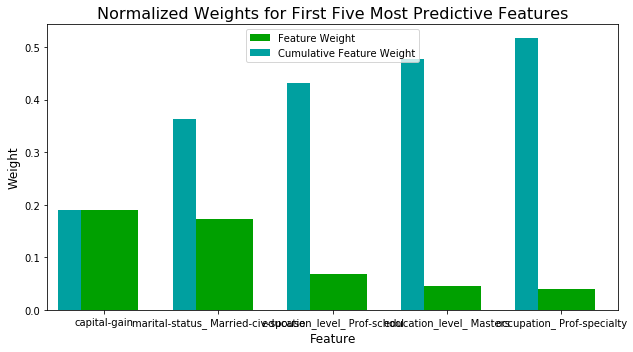

"\n# TODO: Importe um modelo de aprendizado supervisionado que tenha 'feature_importances_'\n\n\n# TODO: Treine o modelo supervisionado no conjunto de treinamento usando .fit (X_train, y_train)\nmodel = None\n\n# TODO: extrair as importâncias do recurso usando .feature_importances_\nimportances = nenhum\n\n# Enredo\nvs.feature_plot (importâncias, X_train, y_train)\n"

In [8]:
# TODO: Import a supervised learning model that has 'feature_importances_'
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
#model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=50)
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
model.fit(X_train,y_train)
# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

"""
# TODO: Importe um modelo de aprendizado supervisionado que tenha 'feature_importances_'


# TODO: Treine o modelo supervisionado no conjunto de treinamento usando .fit (X_train, y_train)
model = None

# TODO: extrair as importâncias do recurso usando .feature_importances_
importances = nenhum

# Enredo
vs.feature_plot (importâncias, X_train, y_train)
"""

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

### Question 7 - Extraindo Importância do Recurso

Observe a visualização criada acima, que exibe os cinco recursos mais relevantes para prever se um indivíduo faz no máximo ou acima de $ 50.000.
* Como esses cinco recursos se comparam aos cinco recursos discutidos na ** Pergunta 6 **?
* Se você estava perto da mesma resposta, como essa visualização confirma seus pensamentos?
* Se você não foi próximo, por que acha que esses recursos são mais relevantes?


**Answer:**

1 - Os recursos mais relevantes em ordem de importancia são:
1) capital-gain, 2) marital-status, 3) education-level, 4) ocupation
o único recurso que errei foi marital-status, foi uma surpresa pra mim, pois nunca imaginei que marital_status fosse tão relevante, a relação como os recursos da pergunta 6 foi muito significativa.

2 - Na verdade eu cheguei muito próximo da resposta, tive uma boa intuição, pois acertei quase todos os recursos.

3 - marital_status - acredito que esse recurso seja importante porque pessoas casadas ganham mais

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

### Seleção de recursos
Como um modelo funciona se usarmos apenas um subconjunto de todos os recursos disponíveis nos dados? Com menos recursos necessários para treinar, a expectativa é que o tempo de treinamento e previsão seja muito menor - ao custo das métricas de desempenho. A partir da visualização acima, vemos que os cinco principais recursos mais importantes contribuem com mais da metade da importância de todos os recursos ** ** presentes nos dados. Isso sugere que podemos tentar * reduzir o espaço de recursos * e simplificar as informações necessárias para o modelo aprender. A célula de código abaixo usará o mesmo modelo otimizado que você encontrou anteriormente e treiná-lo no mesmo conjunto de treinamento * com apenas os cinco principais recursos *.

In [33]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

"""
# Importar funcionalidade para clonar um modelo
do clone de importação sklearn.base

# Reduza o espaço do recurso
X_train_reduced = X_train [X_train.columns.values ​​[(np.argsort (importâncias) [:: - 1]) [: 5]]]
X_test_reduced = X_test [X_test.columns.values ​​[(np.argsort (importâncias) [:: - 1]) [: 5]]]

# Treinar no modelo "melhor" encontrado na pesquisa de grade anterior
clf = (clone (best_clf)). ajuste (X_train_reduced, y_train)

# Faça novas previsões
reduced_predictions = clf.predict (X_test_reduced)

# Relatório de pontuações do modelo final usando ambas as versões de dados
print ("Modelo Final treinado em dados completos \ n ------")
print ("Precisão no teste de dados: {: .4f}". format (accuracy_score (y_test, best_predictions)))
print ("F-score nos dados de teste: {: .4f}". format (fbeta_score (y_test, best_predictions, beta = 0.5)))
print ("\ nFinal Model treinado em dados reduzidos \ n ------")
print ("Precisão no teste de dados: {: .4f}". format (accuracy_score (y_test, reduced_predictions)))
print ("F-score nos dados de teste: {: .4f}". format (fbeta_score (y_test, reduced_predictions, beta = 0.5)))
"""

Final Model trained on full data
------
Accuracy on testing data: 0.8244
F-score on testing data: 0.6436

Final Model trained on reduced data
------
Accuracy on testing data: 0.7735
F-score on testing data: 0.3348


'\n# Importar funcionalidade para clonar um modelo\ndo clone de importação sklearn.base\n\n# Reduza o espaço do recurso\nX_train_reduced = X_train [X_train.columns.values \u200b\u200b[(np.argsort (importâncias) [:: - 1]) [: 5]]]\nX_test_reduced = X_test [X_test.columns.values \u200b\u200b[(np.argsort (importâncias) [:: - 1]) [: 5]]]\n\n# Treinar no modelo "melhor" encontrado na pesquisa de grade anterior\nclf = (clone (best_clf)). ajuste (X_train_reduced, y_train)\n\n# Faça novas previsões\nreduced_predictions = clf.predict (X_test_reduced)\n\n# Relatório de pontuações do modelo final usando ambas as versões de dados\nprint ("Modelo Final treinado em dados completos \\ n ------")\nprint ("Precisão no teste de dados: {: .4f}". format (accuracy_score (y_test, best_predictions)))\nprint ("F-score nos dados de teste: {: .4f}". format (fbeta_score (y_test, best_predictions, beta = 0.5)))\nprint ("\\ nFinal Model treinado em dados reduzidos \\ n ------")\nprint ("Precisão no teste de dados: 

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

### Question 8 - Effects of Feature Selection

* Como o escore F e o escore de precisão do modelo final nos dados reduzidos, usando apenas cinco recursos, se comparam aos mesmos escores quando todos os recursos são usados?
* Se o tempo de treinamento fosse um fator, você consideraria usar os dados reduzidos como seu conjunto de treinamento?


**Answer:**
1 - Observando os dados nota-se que as métricas F-score e Acurácia tiveram um desempenho inferior, quando os recursos foram reduzidos, se antes de reduzir os recursos a Accuracy era de 0.8244 e F-score era de 0.6436, depois da redução de recursos Accuracy e F-score passaram a ser de 0.7735, 0.3348 respectivamente, acredito que isso aconteceu porque de alguma forma não foram selecionados os recursos adequados.

2 - Se o tempo de treinamento fosse um fator, caso esse modelo fosse executado em um dispositivo com capacidade de processamento limitada, como por exemplo sistemas embarcados, eu consideraria usar recursos reduzidos pois o tempo de treinamento foi reduzido consideravelmente, enquanto a pracisão não sofreu uma diminuição significativa.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

> ** Observação **: Depois de concluir todas as implementações de código e responder com êxito a cada pergunta acima, você poderá finalizar seu trabalho exportando o iPython Notebook como um documento HTML. Você pode fazer isso usando o menu acima e navegando para
** Arquivo -> Download como -> HTML (.html) **. Inclua o documento final junto com este caderno como sua submissão.
